# 신용 카드 사용정보 분석하기

In [25]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

## 1. 회원정보 파악하기

In [26]:
# 신용 카드 회원정보를 UCI_Member에 불러오세요
UCI_Member = pd.read_csv(r'.\data\UCI_Credit_Card_회원정보.csv', encoding = 'ms949')
UCI_Member.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
0,1,20000,Female,University,Married,24
1,2,120000,Female,University,Single,26
2,3,90000,Female,University,Single,34
3,4,50000,Female,University,Married,37
4,5,50000,Male,University,Married,57


In [27]:
# UCI_Member의 컬럼 정보를 확인해보세요
UCI_Member.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE'], dtype='object')

In [28]:
# UCI_Member의 컬럼 정보를 ID, 사용한도, 성별, 교육, 결혼, 나이 으로 바꾸세요
UCI_Member = UCI_Member.rename({ 'LIMIT_BAL':'월별사용한도', 'SEX':'성별', 'EDUCATION':'교육', 'MARRIAGE':'결혼', 'AGE':'나이'}, axis = 1)
UCI_Member

,ID,월별사용한도,성별,교육,결혼,나이
0,1,20000,Female,University,Married,24
1,2,120000,Female,University,Single,26
2,3,90000,Female,University,Single,34
3,4,50000,Female,University,Married,37
4,5,50000,Male,University,Married,57
...,...,...,...,...,...,...
29995,29996,220000,Male,High School,Married,39
29996,29997,150000,Male,High School,Single,43
29997,29998,30000,Male,University,Single,37
29998,29999,80000,Male,High School,Married,41


In [29]:
# 회원들의 교육 column에 어떤 값들이 들어가있는지 확인해 보세요.
UCI_Member['교육'].unique()

array(['University', 'Graduate School', 'High School', 'Unknown',
       'Others'], dtype=object)

In [30]:
# 회원들의 정보를 사용한도 순으로 정렬해서 내림차순으로 10개만 출력해보세요.
UCI_Member.sort_values(by = '월별사용한도', ascending = False).head(10)

,ID,월별사용한도,성별,교육,결혼,나이
2197,2198,1000000,Female,Graduate School,Married,47
14919,14920,800000,Male,University,Married,53
18006,18007,800000,Male,Graduate School,Single,46
24320,24321,780000,Male,Graduate School,Married,48
28715,28716,780000,Female,University,Single,41
21375,21376,760000,Male,High School,Married,54
13186,13187,750000,Female,Graduate School,Single,28
3733,3734,750000,Female,University,Married,43
10089,10090,750000,Female,Graduate School,Married,41
4603,4604,750000,Female,High School,Married,40


## 2. 사용정보 파악하기

In [31]:
# 신용 카드 사용정보를 UCI_Usage에 불러오세요
UCI_Usage = pd.read_csv(r'.\data\UCI_Credit_Card_사용정보.csv', encoding = 'ms949')
UCI_Usage.head()

,ID,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,3913.0,3102.0,689.0,0.0,NaN,0.0,NaN,689.0,0.0,0.0,0.0,0.0
1,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,NaN,1000.0,1000.0,1000.0,0.0,2000.0
2,3,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,5,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [32]:
# UCI_Usage의 컬럼 정보를 ID, 1월~6월까지 월별 사용요금, 월별 지불요금으로 아래와 같이 바꿔주세요.
UCI_Usage = UCI_Usage.rename({ 
    'BILL_AMT1':'1월사용요금',
    'BILL_AMT2':'2월사용요금',
    'BILL_AMT3':'3월사용요금',
    'BILL_AMT4':'4월사용요금',
    'BILL_AMT5':'5월사용요금',
    'BILL_AMT6':'6월사용요금',
    'PAY_AMT1' : '1월지불요금',
    'PAY_AMT2' : '2월자불요금',
    'PAY_AMT3' : '3월지불요금',
    'PAY_AMT4' : '4월지불요금',
    'PAY_AMT5' : '5월지불요금',
    'PAY_AMT6' : '6월지불요금'}, axis = 1)
UCI_Usage

,ID,1월사용요금,2월사용요금,3월사용요금,4월사용요금,5월사용요금,6월사용요금,1월지불요금,2월자불요금,3월지불요금,4월지불요금,5월지불요금,6월지불요금
0,1,3913.0,3102.0,689.0,0.0,NaN,0.0,NaN,689.0,0.0,0.0,0.0,0.0
1,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,NaN,1000.0,1000.0,1000.0,0.0,2000.0
2,3,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,5,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,29997,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,29998,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,NaN,0.0,22000.0,4200.0,2000.0,3100.0
29998,29999,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [33]:
# 각 회원마다 사용 정보에 누락 데이터가 있는지 갯수를 세어보세요.
UCI_Usage.isnull().sum(axis = 1)

0        2
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    0
29999    0
Length: 30000, dtype: int64

In [34]:
# 회원들의 사용 정보에 있는 누락 데이터를 0으로 바꿔주세요.
UCI_Usage = UCI_Usage.fillna(0)
UCI_Usage

,ID,1월사용요금,2월사용요금,3월사용요금,4월사용요금,5월사용요금,6월사용요금,1월지불요금,2월자불요금,3월지불요금,4월지불요금,5월지불요금,6월지불요금
0,1,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,3,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,5,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,29997,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,29998,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,29999,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [35]:
# UCI_Usage에 '상반기사용요금', '상반기지불요금' 컬럼을 추가해보세요.
UCI_Usage['상반기사용요금'] = UCI_Usage.iloc[:,1:7].sum(axis = 1)
UCI_Usage['상반기지불요금'] = UCI_Usage.iloc[:,7:13].sum(axis = 1)
UCI_Usage

,ID,1월사용요금,2월사용요금,3월사용요금,4월사용요금,5월사용요금,6월사용요금,1월지불요금,2월자불요금,3월지불요금,4월지불요금,5월지불요금,6월지불요금,상반기사용요금,상반기지불요금
0,1,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,7704.0,689.0
1,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,17077.0,5000.0
2,3,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,101653.0,11018.0
3,4,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,231334.0,8388.0
4,5,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,109339.0,59049.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,725349.0,42550.0
29996,29997,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,21182.0,14490.0
29997,29998,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,70496.0,31300.0
29998,29999,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,266611.0,147181.0


In [36]:
# UCI_Usage에 상반기에 요금을 지불하고 난 후의 잔여대금을 기록한 '상반기잔여대금' 컬럼을 추가해보세요.
UCI_Usage['상반기잔여대금'] = UCI_Usage['상반기사용요금'] - UCI_Usage['상반기지불요금']
UCI_Usage

,ID,1월사용요금,2월사용요금,3월사용요금,4월사용요금,5월사용요금,6월사용요금,1월지불요금,2월자불요금,3월지불요금,4월지불요금,5월지불요금,6월지불요금,상반기사용요금,상반기지불요금,상반기잔여대금
0,1,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,7704.0,689.0,7015.0
1,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,17077.0,5000.0,12077.0
2,3,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,101653.0,11018.0,90635.0
3,4,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,231334.0,8388.0,222946.0
4,5,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,109339.0,59049.0,50290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,725349.0,42550.0,682799.0
29996,29997,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,21182.0,14490.0,6692.0
29997,29998,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,70496.0,31300.0,39196.0
29998,29999,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,266611.0,147181.0,119430.0


In [37]:
# 월별 사용요금, 지불요금 컬럼을 삭제하세요.
UCI_Usage = UCI_Usage.drop(['1월사용요금','2월사용요금','3월사용요금','4월사용요금','5월사용요금','6월사용요금',
                '1월지불요금','2월자불요금','3월지불요금','4월지불요금','5월지불요금','6월지불요금'], axis = 1)
UCI_Usage

,ID,상반기사용요금,상반기지불요금,상반기잔여대금
0,1,7704.0,689.0,7015.0
1,2,17077.0,5000.0,12077.0
2,3,101653.0,11018.0,90635.0
3,4,231334.0,8388.0,222946.0
4,5,109339.0,59049.0,50290.0
...,...,...,...,...
29995,29996,725349.0,42550.0,682799.0
29996,29997,21182.0,14490.0,6692.0
29997,29998,70496.0,31300.0,39196.0
29998,29999,266611.0,147181.0,119430.0


## 3. 두 데이터 합치고 분석하기

In [38]:
# 이제 회원정보 DataFrame UCI_Member와 사용정보 DataFrame UCI_Usage 를 ID를 기준으로 merge해서 UCI_Card에 저장하세요.

UCI_Card = UCI_Member.merge(UCI_Usage, how = 'left', on = 'ID')
UCI_Card

,ID,월별사용한도,성별,교육,결혼,나이,상반기사용요금,상반기지불요금,상반기잔여대금
0,1,20000,Female,University,Married,24,7704.0,689.0,7015.0
1,2,120000,Female,University,Single,26,17077.0,5000.0,12077.0
2,3,90000,Female,University,Single,34,101653.0,11018.0,90635.0
3,4,50000,Female,University,Married,37,231334.0,8388.0,222946.0
4,5,50000,Male,University,Married,57,109339.0,59049.0,50290.0
...,...,...,...,...,...,...,...,...,...
29995,29996,220000,Male,High School,Married,39,725349.0,42550.0,682799.0
29996,29997,150000,Male,High School,Single,43,21182.0,14490.0,6692.0
29997,29998,30000,Male,University,Single,37,70496.0,31300.0,39196.0
29998,29999,80000,Male,High School,Married,41,266611.0,147181.0,119430.0


In [39]:
# UCI_Card 데이터를 상반기 사용요금이 큰 순서대로 정렬하여 10개만 출력해보세요.
UCI_Card.sort_values(by = '상반기사용요금', ascending = False).head(10)

,ID,월별사용한도,성별,교육,결혼,나이,상반기사용요금,상반기지불요금,상반기잔여대금
2197,2198,1000000,Female,Graduate School,Married,47,5263883.0,1147803.0,4116080.0
20892,20893,550000,Male,Graduate School,Single,35,3554591.0,100532.0,3454059.0
8229,8230,500000,Male,Graduate School,Married,42,3465510.0,133972.0,3331538.0
26547,26548,520000,Female,High School,Married,54,3398917.0,119000.0,3279917.0
26227,26228,610000,Female,Graduate School,Single,38,3293126.0,115764.0,3177362.0
21381,21382,680000,Male,University,Single,64,3290058.0,120800.0,3169258.0
28142,28143,430000,Female,Unknown,Single,44,3148839.0,103721.0,3045118.0
25146,25147,500000,Male,Graduate School,Married,54,3127490.0,110000.0,3017490.0
25817,25818,530000,Female,University,Married,44,3119867.0,124042.0,2995825.0
14553,14554,450000,Male,University,Single,30,3112336.0,532465.0,2579871.0


In [40]:
# 사용자들의 성별, 교육 을 기준으로 상반기 사용요금, 상반기 지불요금의 평균을 구해보세요. 소수점 둘째자리까지 반올림하세요
UCI_Card.groupby(['성별','교육'])['상반기사용요금','상반기지불요금'].mean().round(2)

상반기사용요금   상반기지불요금
성별     교육                                  
Female Graduate School  239231.16  37436.97
       High School      238908.12  25973.08
       Others           223057.49  34410.84
       University       283306.83  28656.77
       Unknown          382816.13  40456.19
Male   Graduate School  298995.08  40390.40
       High School      256197.41  24314.88
       Others           309197.60  43099.26
       University       275709.03  27695.39
       Unknown          360702.91  44827.54

In [41]:
# UCI_Card 에 상반기 사용요금 대비 상반기 지불요금의 비율을 구해서 '상반기지불율' 컬럼을 만들어보세요
# 조건
# 1. 먼저 Boolean Indexing을 사용해 먼저 상반기 사용요금이 0 이하인 행을 제거하고, 다음에 상반기 잔여대금이 0 미만인 행을 제거하세요.
# 2. % 값으로 구하기 위해 100을 곱하고 소수 둘째자리까지 반올림하세요
UCI_Card = UCI_Card[UCI_Card['상반기사용요금'] > 0]
UCI_Card = UCI_Card[UCI_Card['상반기잔여대금'] >= 0]
UCI_Card['상반기지불율'] = UCI_Card['상반기지불요금']/UCI_Card['상반기사용요금']*100
UCI_Card['상반기지불율'] = round(UCI_Card['상반기지불율'],2)

In [42]:
# 사용자들의 상반기 지불율을 기준으로 정렬하여 높은 순서대로 1000개만 출력하세요
UCI_Card.sort_values(by = '상반기지불율', ascending = False).head(1000)

,ID,월별사용한도,성별,교육,결혼,나이,상반기사용요금,상반기지불요금,상반기잔여대금,상반기지불율
21623,21624,120000,Female,Graduate School,Single,24,1000.0,1000.0,0.0,100.00
18266,18267,200000,Male,University,Married,53,9673.0,9673.0,0.0,100.00
22132,22133,20000,Female,Graduate School,Single,24,2504.0,2504.0,0.0,100.00
10905,10906,240000,Female,Graduate School,Married,40,3756.0,3756.0,0.0,100.00
19326,19327,230000,Female,University,Married,40,12653.0,12653.0,0.0,100.00
...,...,...,...,...,...,...,...,...,...,...
14735,14736,400000,Female,University,Single,44,145331.0,141048.0,4283.0,97.05
4749,4750,50000,Male,University,Married,58,14955.0,14514.0,441.0,97.05
10440,10441,200000,Male,Graduate School,Married,38,103048.0,100000.0,3048.0,97.04
11318,11319,20000,Female,University,Single,22,21521.0,20883.0,638.0,97.04


In [19]:
# 사용자들의 성별, 결혼 을 기준으로 상반기 지불율의 평균을 구해보세요.
UCI_Card.groupby(['성별','결혼'])['상반기지불율'].mean().to_frame()

상반기지불율
성별     결혼                
Female Married  26.394014
       Others   24.588104
       Single   25.546920
Male   Married  24.483456
       Others   18.373577
       Single   21.582382

In [43]:
# 사용자들의 교육 을 기준으로 상반기사용요금의 합과 평균을 구해보세요.
UCI_Card.groupby(['교육'])['상반기사용요금'].agg(['sum','mean'])

,sum,mean
교육,,
Graduate School,2.728429e+09,319039.862371
High School,1.196867e+09,270968.302241
Others,3.021512e+07,318053.884211
University,3.903790e+09,309064.184546
Unknown,1.280543e+08,415760.636364


## 4. 데이터 시각화

In [44]:
import seaborn as sns
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system!!') 

In [45]:
df0 = UCI_Card['성별'].value_counts().to_frame()

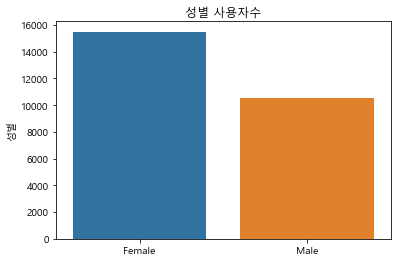

In [46]:

ax = sns.barplot( y = '성별',x = df0.index, data=df0)
plt.title("성별 사용자수")
plt.show()

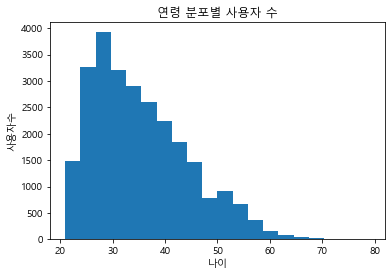

In [48]:
df = UCI_Card.rename({'교육':'교육 수준', '월별사용한도':'월별 사용 한도'}, axis = 1)
plt.hist(df['나이'], bins = 20)
plt.xlabel('나이')

plt.ylabel('사용자수')
plt.title('연령 분포별 사용자 수')
plt.show()

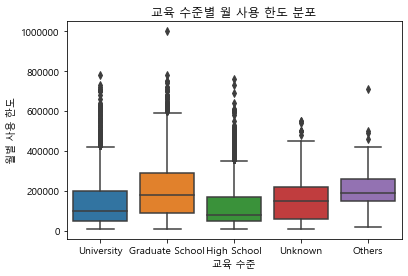

In [49]:
ax = sns.boxplot(x="교육 수준", y="월별 사용 한도", data=df)
plt.title('교육 수준별 월 사용 한도 분포')
plt.show()

In [50]:
UCI_Card['나이'].to_frame()

,나이
0,24
1,26
2,34
3,37
4,57
...,...
29995,39
29996,43
29997,37
29998,41


In [51]:
# 어떤 고객 세그먼트가 지급율이 높은가?
UCI_Card['나이대'] = [int(str(x)[0] + '0') for x in UCI_Card['나이']]
UCI_Card['월별사용한도'] = UCI_Card['월별사용한도'].round(2) 

In [52]:
df = UCI_Card.groupby(['성별','교육','나이대','결혼'])[['상반기지불율','월별사용한도']].mean()

In [53]:
df['사용자수'] = UCI_Card.groupby(['성별','교육','나이대','결혼'])['상반기지불율'].count().values

In [54]:
UCI_Card['상반기지불율분위'] = pd.qcut(UCI_Card['상반기지불율'],5, labels=range(0,5))
UCI_Card['월별사용한도분위'] = pd.qcut(UCI_Card['월별사용한도'],5, labels=range(0,5))
df2 = UCI_Card.groupby(['월별사용한도분위','상반기지불율분위'])['ID'].count().to_frame()

In [55]:
UCI_Card.groupby(['월별사용한도분위','상반기지불율분위']).mean().to_csv('data.csv', encoding = 'ms949')

In [56]:
df2 = df2.reset_index()

In [57]:
df2_pivot = df2.pivot_table(index = '상반기지불율분위', columns = '월별사용한도분위', values = 'ID')

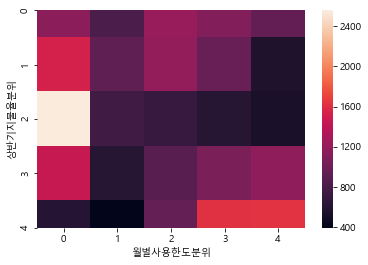

In [58]:
sns.heatmap(df2_pivot)
plt.show()

In [ ]:
수익성 : 지분율제고 - 한도가 낮음에도 불구하고 잔여대금이 없고, 지분율이 높은 사람을 
    파악해서 카드 한도를 올리는 것을 추천드리기(은행 입장에서 카드대금결제 수익확보)
    
카드 한도를 5분위로 나누어서 0분위(한도가 가장 낮음) - 5분위(한도가 가장 높음)
- 여기서 잔여대금이 없고(연체율이 낮음), 지불율이 높은 고객군을 나이, 성별, 학력, 결혼 유무에 따라 나눠 분위별로 찾아보기 